# V1

In [150]:
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [74]:
df = pd.read_csv('./utils/experiment.csv', sep=';')

In [75]:
df.columns

Index(['sample', 'start', 'latency'], dtype='object')

In [76]:
df['start'] = df['start'].apply(lambda x: x.split('.')[0])

In [78]:
df['latency'] = df['latency'].apply(lambda x: math.floor(x/1000))

In [79]:
df

,sample,start,latency
0,23,20:23:21,3
1,1,20:23:03,3
2,64,20:23:55,3
3,2,20:23:03,3
4,3,20:23:04,3
...,...,...,...
58,40,20:23:21,17
59,62,20:23:39,18
60,46,20:23:25,19
61,61,20:23:38,19


In [204]:
data = {'count' : Counter(), 'avg': Counter()}
for item in pd.date_range("20:23:03", "20:23:55", freq="1s"):
    data['count'][item.strftime('%H:%M:%S')] = 0
    data['avg'][item.strftime('%H:%M:%S')] = 0

In [205]:
for _, item in df.iterrows():
    d = datetime.strptime(item.start, '%H:%M:%S')
    dd = d
    data['count'][dd.strftime('%H:%M:%S')] += 1
    for iitem in range(item.latency):
        dd = dd + timedelta(seconds=1)
        data['count'][dd.strftime('%H:%M:%S')] += 1
    data['avg'][(d).strftime('%H:%M:%S')] += item.latency

In [206]:
for item in data['count'].keys():
    if data['count'][item] != 0:
        data['avg'][item] /= data['count'][item]

In [207]:
data_parsed = {'count': data['count'].values(), 'avg': data['avg'].values()}

In [208]:
data_parsed = {'avg': {k:v for k, v in data['avg'].items() if float(v) > 0.0}}

In [209]:
data_parsed['count'] = data['count']

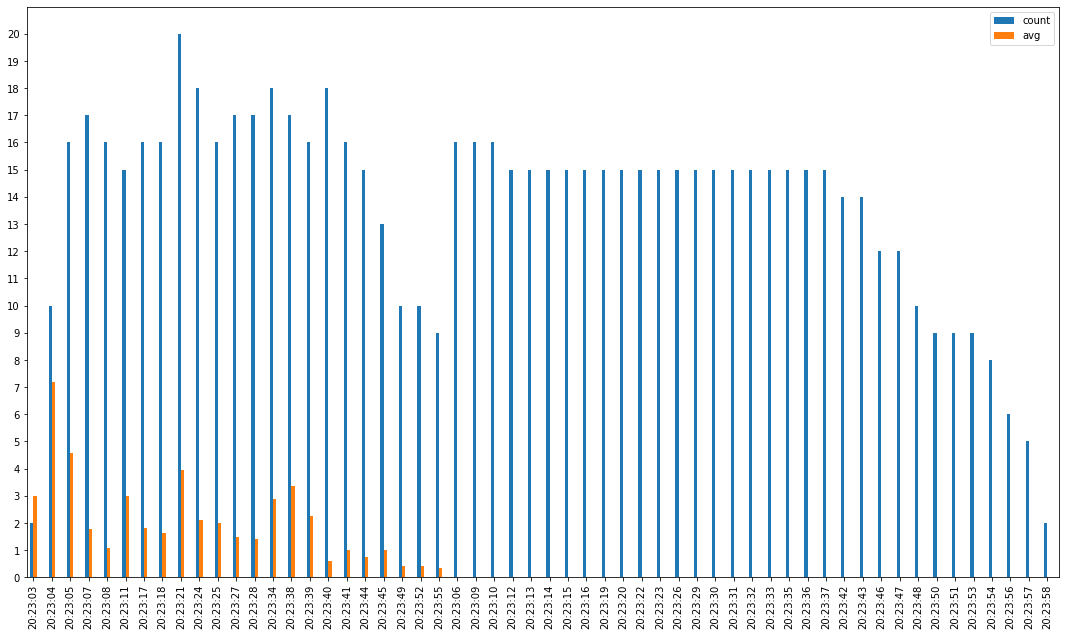

In [210]:
width = .35 # width of a bar

m1_t = pd.DataFrame(data_parsed)

m1_t[['count', 'avg']].plot(kind='bar', width = width)

ax = plt.gca()
plt.xlim([-width, len(m1_t['count'])-width])
ax.set_yticks(np.arange(0, max(m1_t['count'])+1, 1))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [198]:
data_parsed

{'avg': {'20:23:06': 0.375,
  '20:23:07': 0.35294117647058826,
  '20:23:10': 1.25,
  '20:23:16': 2.3333333333333335,
  '20:23:17': 1.5625,
  '20:23:18': 0.8125,
  '20:23:20': 0.8666666666666667,
  '20:23:21': 3.35,
  '20:23:24': 1.6666666666666667,
  '20:23:25': 1.0625,
  '20:23:27': 1.8823529411764706,
  '20:23:28': 1.2352941176470589,
  '20:23:33': 0.6,
  '20:23:34': 2.3333333333333335,
  '20:23:37': 1.9333333333333333,
  '20:23:38': 3.411764705882353,
  '20:23:40': 2.2222222222222223,
  '20:23:41': 1.3125,
  '20:23:44': 1.8666666666666667,
  '20:23:45': 0.8461538461538461,
  '20:23:47': 1.6666666666666667,
  '20:23:48': 1.0,
  '20:23:49': 1.1,
  '20:23:52': 1.3,
  '20:23:53': 0.4444444444444444,
  '20:23:55': 5.444444444444445,
  '20:23:58': 8.0,
  '20:23:56': 0.6666666666666666,
  '20:23:57': 10.6},
 'count': Counter({'20:23:03': 2,
          '20:23:04': 10,
          '20:23:05': 16,
          '20:23:06': 16,
          '20:23:07': 17,
          '20:23:08': 16,
          '20:23:09':

# V2

In [570]:
from xml.dom import minidom

In [591]:
s = """
<testResults version="1.2">
<httpSample t="3249" lt="3249" ts="1608668942320" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;269e77a5-2df1-4df3-9102-735a62be7cde&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.215},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.792},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.017,&quot;init&quot;:&quot;2020-12-22 20:29:02.086856&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:05.104125&quot;}</responseData>
</httpSample>
<httpSample t="3190" lt="3190" ts="1608668942737" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f985f689-6121-4381-92f7-31dd45db0286&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.187},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.793},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.992,&quot;init&quot;:&quot;2020-12-22 20:29:02.471820&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:05.464080&quot;}</responseData>
</httpSample>
<httpSample t="3169" lt="3169" ts="1608668943154" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;86787012-6aca-4e40-bc8e-76a50adcbf7e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.127},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.85},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.988,&quot;init&quot;:&quot;2020-12-22 20:29:02.872664&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:05.860314&quot;}</responseData>
</httpSample>
<httpSample t="3158" lt="3158" ts="1608668943577" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;560a2aa3-b00e-4823-9bc6-198b019be8e7&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.187},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.78},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.012}},&quot;success&quot;:true,&quot;elapsed&quot;:2.98,&quot;init&quot;:&quot;2020-12-22 20:29:03.291427&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:06.271907&quot;}</responseData>
</httpSample>
<httpSample t="4191" lt="4191" ts="1608668944405" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;cb2e5297-44ed-4b0b-927d-bd8c10be1c49&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.136},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.786},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.933,&quot;init&quot;:&quot;2020-12-22 20:29:05.200377&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:08.133000&quot;}</responseData>
</httpSample>
<httpSample t="3761" lt="3761" ts="1608668945239" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;90045b49-d019-45dd-9ce9-f1c2d6d0195f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.208},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.771},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.99,&quot;init&quot;:&quot;2020-12-22 20:29:05.546636&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:08.536828&quot;}</responseData>
</httpSample>
<httpSample t="4222" lt="4222" ts="1608668945655" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4f1f36cf-3afd-4a5a-933c-cd42f9970699&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.182},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.807},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:3.001,&quot;init&quot;:&quot;2020-12-22 20:29:06.408171&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:09.409642&quot;}</responseData>
</httpSample>
<httpSample t="4356" lt="4356" ts="1608668945568" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c4c400d6-d113-444f-8656-cb9569b3d05c&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.193},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.392},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.595,&quot;init&quot;:&quot;2020-12-22 20:29:05.866231&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:09.461356&quot;}</responseData>
</httpSample>
<httpSample t="6746" lt="6746" ts="1608668944822" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e1d20bd9-6e29-4f77-a230-8b5532f47c73&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.187},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.771},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.968,&quot;init&quot;:&quot;2020-12-22 20:29:08.135687&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:11.104122&quot;}</responseData>
</httpSample>
<httpSample t="5680" lt="5680" ts="1608668946324" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;402e8c98-7281-4759-baac-42babd04f22a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.212},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.766},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.99,&quot;init&quot;:&quot;2020-12-22 20:29:08.549634&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:11.539950&quot;}</responseData>
</httpSample>
<httpSample t="4396" lt="4396" ts="1608668948597" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c1711d57-bd88-4840-847d-520a4c87a331&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.119},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.931},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.061,&quot;init&quot;:&quot;2020-12-22 20:29:09.469508&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:12.530357&quot;}</responseData>
</httpSample>
<httpSample t="8622" lt="8622" ts="1608668945928" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;02675dda-d6a3-46c5-a094-2682d9de4007&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.205},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.764},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.979,&quot;init&quot;:&quot;2020-12-22 20:29:11.108191&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:14.087364&quot;}</responseData>
</httpSample>
<httpSample t="5953" lt="5953" ts="1608668949001" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;6e1ea257-c768-44cd-aef9-0fc66fd164c7&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.138},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.788},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.938,&quot;init&quot;:&quot;2020-12-22 20:29:11.552162&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:14.490325&quot;}</responseData>
</httpSample>
<httpSample t="11839" lt="11839" ts="1608668943986" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e0886209-c31a-49a8-91c9-8042a76126fd&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.163},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.758},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.934,&quot;init&quot;:&quot;2020-12-22 20:29:09.412314&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:12.346079&quot;}</responseData>
</httpSample>
<httpSample t="9089" lt="9089" ts="1608668946736" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;daff6953-cb87-4b54-9fc0-82983f4dfb97&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.159},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.844},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.015,&quot;init&quot;:&quot;2020-12-22 20:29:12.346775&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:15.361319&quot;}</responseData>
</httpSample>
<httpSample t="1710" lt="1710" ts="1608668955825" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="5968" lt="5968" ts="1608668951568" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2b9e705e-2576-401d-973f-ff66020145c3&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.156},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.814},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.981,&quot;init&quot;:&quot;2020-12-22 20:29:14.091208&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:17.071755&quot;}</responseData>
</httpSample>
<httpSample t="9042" lt="9042" ts="1608668949877" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c3fbe07e-541a-46a7-9426-1c08b6fa3324&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.159},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.787},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.955,&quot;init&quot;:&quot;2020-12-22 20:29:12.533609&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:15.489033&quot;}</responseData>
</httpSample>
<httpSample t="12430" lt="12430" ts="1608668946490" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;5ad01e06-506b-4fa1-889d-4ccdcbf3d05e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.184},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.772},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.966,&quot;init&quot;:&quot;2020-12-22 20:29:15.489830&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:18.456085&quot;}</responseData>
</httpSample>
<httpSample t="9153" lt="9153" ts="1608668949924" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4d0f90d4-e96d-40ee-8515-662649ba12a3&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.132},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.099},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.243,&quot;init&quot;:&quot;2020-12-22 20:29:15.369787&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:18.613240&quot;}</responseData>
</httpSample>
<httpSample t="4662" lt="4662" ts="1608668955825" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4a224ecf-4ab5-4995-9139-651dd40072c6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.159},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.781},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.949,&quot;init&quot;:&quot;2020-12-22 20:29:17.074912&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:20.024306&quot;}</responseData>
</httpSample>
<httpSample t="15230" lt="15230" ts="1608668946072" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;a3352b3c-fad7-4672-a321-52f4ed5342ba&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.188},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.791},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.99,&quot;init&quot;:&quot;2020-12-22 20:29:14.493141&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:17.483625&quot;}</responseData>
</httpSample>
<httpSample t="9298" lt="9298" ts="1608668952004" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;b8edc0fc-73fc-4529-9a19-b75cec480373&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.177},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.165},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.354,&quot;init&quot;:&quot;2020-12-22 20:29:17.484332&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:20.838354&quot;}</responseData>
</httpSample>
<httpSample t="7440" lt="7440" ts="1608668954551" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;86d6caf7-872b-4be8-a2c7-729bbd9899d9&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.189},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.869},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.068,&quot;init&quot;:&quot;2020-12-22 20:29:18.459512&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:21.527869&quot;}</responseData>
</httpSample>
<httpSample t="3208" lt="3208" ts="1608668958921" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;0a222351-dd83-4139-844a-72353c9b4189&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.16},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.867},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.038,&quot;init&quot;:&quot;2020-12-22 20:29:18.626004&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:21.663974&quot;}</responseData>
</httpSample>
<httpSample t="6950" lt="6950" ts="1608668957537" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;bcba872a-94cc-479d-8af7-73062b6367a6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.145},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.025},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.182,&quot;init&quot;:&quot;2020-12-22 20:29:20.840542&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:24.022149&quot;}</responseData>
</httpSample>
<httpSample t="4619" lt="4619" ts="1608668960489" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;6785814f-c1fc-4a6e-850d-07dbcf8997a2&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.165},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.937},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.112,&quot;init&quot;:&quot;2020-12-22 20:29:21.531560&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:24.643901&quot;}</responseData>
</httpSample>
<httpSample t="19589" lt="19589" ts="1608668946906" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;02424785-184b-4b16-bc5f-32e7adb6d784&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.181},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.802},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.993,&quot;init&quot;:&quot;2020-12-22 20:29:20.027155&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:23.020462&quot;}</responseData>
</httpSample>
<httpSample t="7575" lt="7575" ts="1608668958921" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;dfe5d0ee-b10e-4fcb-8712-8d14df299791&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.196},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.804},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.01,&quot;init&quot;:&quot;2020-12-22 20:29:23.021159&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:26.031338&quot;}</responseData>
</httpSample>
<httpSample t="3550" lt="3550" ts="1608668964488" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2a8c2b39-325c-4dc8-9cf0-5ff39f849a15&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.139},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.777},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.927,&quot;init&quot;:&quot;2020-12-22 20:29:24.646738&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:27.573355&quot;}</responseData>
</httpSample>
<httpSample t="7494" lt="7494" ts="1608668961992" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;df3a53c9-5834-49b6-af7b-17581a5aefc7&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.185},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.793},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.988,&quot;init&quot;:&quot;2020-12-22 20:29:26.033655&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:29.021787&quot;}</responseData>
</httpSample>
<httpSample t="9047" lt="9047" ts="1608668961303" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;775e3b5f-de70-44a7-8820-231ab4206c92&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.146},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.771},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.929,&quot;init&quot;:&quot;2020-12-22 20:29:24.025740&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:26.954807&quot;}</responseData>
</httpSample>
<httpSample t="8221" lt="8221" ts="1608668962129" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f7840c77-a571-4b23-a921-9a248044391c&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.13},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.788},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.93,&quot;init&quot;:&quot;2020-12-22 20:29:26.955512&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:29.885203&quot;}</responseData>
</httpSample>
<httpSample t="13452" lt="13452" ts="1608668957537" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;eead48a2-a3ba-4dce-a076-8cca2c2b4e9f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.122},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.818},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.95,&quot;init&quot;:&quot;2020-12-22 20:29:27.575222&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:30.524849&quot;}</responseData>
</httpSample>
<httpSample t="10783" lt="10783" ts="1608668961303" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;47d4cac2-168a-4435-aeb6-02820748bbfc&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.151},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.795},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.958,&quot;init&quot;:&quot;2020-12-22 20:29:28.662784&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:31.620798&quot;}</responseData>
</httpSample>
<httpSample t="17131" lt="17131" ts="1608668954954" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c3c1a994-52de-46c4-952f-e0c93a11bead&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.133},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.885},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.03,&quot;init&quot;:&quot;2020-12-22 20:29:21.667943&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:24.697598&quot;}</responseData>
</httpSample>
<httpSample t="19093" lt="19093" ts="1608668952994" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;196f445c-6f83-4fe3-9abf-16496a31b503&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.194},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.758},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.964,&quot;init&quot;:&quot;2020-12-22 20:29:24.698289&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:28.662074&quot;}</responseData>
</httpSample>
<httpSample t="5952" lt="5952" ts="1608668966496" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2967c6ee-3d5b-42a2-acb5-be2ba1d909bd&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.178},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.771},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.959,&quot;init&quot;:&quot;2020-12-22 20:29:29.024080&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:31.983352&quot;}</responseData>
</httpSample>
<httpSample t="6932" lt="6932" ts="1608668966496" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e637e750-749e-42e6-864c-2d97f43441e4&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.18},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.884},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.075,&quot;init&quot;:&quot;2020-12-22 20:29:29.887428&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:32.962915&quot;}</responseData>
</httpSample>
<httpSample t="2945" lt="2945" ts="1608668972085" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="9926" lt="9926" ts="1608668965109" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7d6666c5-0ed1-4c35-9bd5-6dcb38b0669a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.168},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.764},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.943,&quot;init&quot;:&quot;2020-12-22 20:29:31.623059&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:34.565659&quot;}</responseData>
</httpSample>
<httpSample t="3020" lt="3020" ts="1608668972085" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;43b3d9a0-1ecd-4476-b059-6042ea7c6640&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.151},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.757},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.919,&quot;init&quot;:&quot;2020-12-22 20:29:31.722639&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:34.641499&quot;}</responseData>
</httpSample>
<httpSample t="3183" lt="3183" ts="1608668972448" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;6f7ee3a7-1e22-472d-bdcb-e8a4fa4a9124&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.212},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.855},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.078,&quot;init&quot;:&quot;2020-12-22 20:29:32.087689&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:35.165469&quot;}</responseData>
</httpSample>
<httpSample t="17343" lt="17343" ts="1608668959079" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2349334a-a5ea-490e-a5a6-54a9d6431a23&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.183},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.784},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.978,&quot;init&quot;:&quot;2020-12-22 20:29:32.978653&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:35.956345&quot;}</responseData>
</httpSample>
<httpSample t="6394" lt="6394" ts="1608668972087" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;453fceab-86e1-4fba-938d-eea4c6d3d92a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.195},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.16},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.366,&quot;init&quot;:&quot;2020-12-22 20:29:34.651634&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:38.017672&quot;}</responseData>
</httpSample>
<httpSample t="3101" lt="3101" ts="1608668975631" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;307bf31c-a9ec-48fc-9cac-22cea946a0cb&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.197},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.784},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.993,&quot;init&quot;:&quot;2020-12-22 20:29:35.273985&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:38.267377&quot;}</responseData>
</httpSample>
<httpSample t="5956" lt="5956" ts="1608668973428" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;5cb37c4f-e6e5-4a00-a7ee-5d97674d67b9&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.2},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.749},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.96,&quot;init&quot;:&quot;2020-12-22 20:29:35.958654&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:38.918644&quot;}</responseData>
</httpSample>
<httpSample t="6392" lt="6392" ts="1608668975107" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;819d729a-7df3-43bf-83d2-9da7c9d7629b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.151},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.853},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.014,&quot;init&quot;:&quot;2020-12-22 20:29:38.020065&quot;,&quot;end&quot;:&quot;2020-12-22 20:29:41.034235&quot;}</responseData>
</httpSample>

</testResults>


"""

In [625]:
s_2 = """
<testResults version="1.2">
<httpSample t="8039" lt="8039" ts="1608681115181" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;808343de-2f2d-44b9-8dfd-386ddc3ecb25&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:5.732},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.052},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.024}},&quot;success&quot;:true,&quot;elapsed&quot;:7.809,&quot;init&quot;:&quot;2020-12-22 23:51:54.767324&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:02.576338&quot;}</responseData>
</httpSample>
<httpSample t="5406" lt="5406" ts="1608681123220" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;83eb38a1-3677-4d9d-abe1-41fbcd02be01&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.302},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.027},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.342,&quot;init&quot;:&quot;2020-12-22 23:52:02.640608&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:07.982303&quot;}</responseData>
</httpSample>
<httpSample t="5861" lt="5861" ts="1608681128626" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4f70a9cb-a83d-4e16-8e54-41066577e69a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.308},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.021},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.34,&quot;init&quot;:&quot;2020-12-22 23:52:08.503246&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:13.843136&quot;}</responseData>
</httpSample>
<httpSample t="75395" lt="75395" ts="1608681118517" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;25724296-6561-4f1c-9bfb-b4037c101365&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.279},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.047},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.336,&quot;init&quot;:&quot;2020-12-22 23:52:24.987909&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:30.323782&quot;}</responseData>
</httpSample>
<httpSample t="76649" lt="76649" ts="1608681117264" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;1b7d98ba-8bb0-40f0-9116-0de446c049a5&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.704},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.994},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.708,&quot;init&quot;:&quot;2020-12-22 23:52:19.278906&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:24.987049&quot;}</responseData>
</httpSample>
<httpSample t="77899" lt="77899" ts="1608681116015" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;79ab709e-0798-4045-8c0b-e6aa54e5fbc4&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.379},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.032},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:5.422,&quot;init&quot;:&quot;2020-12-22 23:52:13.855648&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:19.278105&quot;}</responseData>
</httpSample>
<httpSample t="74979" lt="74979" ts="1608681118933" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;a62a8b71-f1a5-4e12-bfdf-5bc385c9bf07&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.287},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.995},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.292,&quot;init&quot;:&quot;2020-12-22 23:52:57.104506&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:02.396245&quot;}</responseData>
</httpSample>
<httpSample t="74134" lt="74134" ts="1608681119789" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;642e4262-a554-417c-95fd-956fe38d32c8&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.29},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.994},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.295,&quot;init&quot;:&quot;2020-12-22 23:52:30.324549&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:35.619243&quot;}</responseData>
</httpSample>
<httpSample t="75813" lt="75813" ts="1608681118099" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7a7942cd-00c5-4ff7-9e76-e131c5e5bc68&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.262},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.024},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.295,&quot;init&quot;:&quot;2020-12-22 23:52:51.808528&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:57.103721&quot;}</responseData>
</httpSample>
<httpSample t="76231" lt="76231" ts="1608681117682" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;ae3be7bb-4c36-4644-a042-c6f1a9d93ad6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.279},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.263},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.553,&quot;init&quot;:&quot;2020-12-22 23:53:02.397042&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:07.950433&quot;}</responseData>
</httpSample>
<httpSample t="77481" lt="77481" ts="1608681116431" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;8f90f02e-4f75-4761-8bb2-d4582a17e798&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.302},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.002},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.314,&quot;init&quot;:&quot;2020-12-22 23:53:07.951251&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:13.265180&quot;}</responseData>
</httpSample>
<httpSample t="78313" lt="78313" ts="1608681115599" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;aaf3481c-2786-4c2c-9f66-eed33e9eda23&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.364},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.012},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.387,&quot;init&quot;:&quot;2020-12-22 23:52:40.981633&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:46.368309&quot;}</responseData>
</httpSample>
<httpSample t="74586" lt="74586" ts="1608681119349" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;689de0e0-ecc9-42ca-8882-bde45d496f90&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.282},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.147},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.439,&quot;init&quot;:&quot;2020-12-22 23:52:46.369193&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:51.807749&quot;}</responseData>
</httpSample>
<httpSample t="77086" lt="77086" ts="1608681116847" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c0ab3e3c-512e-4c03-aba3-5141dce5460a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.272},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.076},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:5.361,&quot;init&quot;:&quot;2020-12-22 23:52:35.619999&quot;,&quot;end&quot;:&quot;2020-12-22 23:52:40.980579&quot;}</responseData>
</httpSample>
<httpSample t="64862" lt="64862" ts="1608681134488" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7cd23014-775e-4839-8123-ef8c14d1d12b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.423},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.001},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.434,&quot;init&quot;:&quot;2020-12-22 23:53:13.267472&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:18.701058&quot;}</responseData>
</httpSample>
<httpSample t="10876" lt="10876" ts="1608681193914" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;516b21c9-7433-4343-b525-4e53ccc64daf&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.427},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.003},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.441,&quot;init&quot;:&quot;2020-12-22 23:53:18.705072&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:24.145800&quot;}</responseData>
</httpSample>
<httpSample t="16457" lt="16457" ts="1608681193936" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7de12631-940b-4abc-b562-515e7dda9c4b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.329},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.011},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.351,&quot;init&quot;:&quot;2020-12-22 23:53:24.397115&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:29.747898&quot;}</responseData>
</httpSample>
<httpSample t="48986" lt="48986" ts="1608681193933" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;933ecde6-1983-4d46-979a-d780a4bf9a17&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.283},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.999},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.294,&quot;init&quot;:&quot;2020-12-22 23:53:40.424395&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:45.718084&quot;}</responseData>
</httpSample>
<httpSample t="48975" lt="48975" ts="1608681193944" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c82ca339-c745-4020-912f-7027cb6a095b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.303},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.184},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.498,&quot;init&quot;:&quot;2020-12-22 23:53:51.187776&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:56.685925&quot;}</responseData>
</httpSample>
<httpSample t="48986" lt="48986" ts="1608681193933" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;fa54dbc3-9b68-4479-abe5-dcb5ffb7a033&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.295},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.162},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.468,&quot;init&quot;:&quot;2020-12-22 23:53:45.718921&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:51.186805&quot;}</responseData>
</httpSample>
<httpSample t="38128" lt="38128" ts="1608681204791" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d88bf61f-f8aa-4164-97dd-682d8e0179b2&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.297},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.278},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.585,&quot;init&quot;:&quot;2020-12-22 23:53:56.686758&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:02.271627&quot;}</responseData>
</httpSample>
<httpSample t="48984" lt="48984" ts="1608681193935" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d6e49939-9dce-4baa-8246-790b0dd9d903&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.278},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.033},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.322,&quot;init&quot;:&quot;2020-12-22 23:53:35.101772&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:40.423552&quot;}</responseData>
</httpSample>
<httpSample t="48985" lt="48985" ts="1608681193933" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;b856a651-2d39-4f30-9dc6-c4374259ab0a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.315},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.017},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.342,&quot;init&quot;:&quot;2020-12-22 23:53:29.758783&quot;,&quot;end&quot;:&quot;2020-12-22 23:53:35.100768&quot;}</responseData>
</httpSample>
<httpSample t="71012" lt="71012" ts="1608681193945" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e211f329-ba27-43c1-b839-ed28bbd2b18e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.45},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.31},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.771,&quot;init&quot;:&quot;2020-12-22 23:54:18.536321&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:24.307247&quot;}</responseData>
</httpSample>
<httpSample t="71015" lt="71015" ts="1608681193943" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;be5b9867-57fd-4996-9f53-c1ea9cc8502f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.29},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.008},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.308,&quot;init&quot;:&quot;2020-12-22 23:54:07.658964&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:12.966752&quot;}</responseData>
</httpSample>
<httpSample t="71025" lt="71025" ts="1608681193933" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;25800972-fe02-4b5d-9e63-fe94a881dbb4&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.286},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.271},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.568,&quot;init&quot;:&quot;2020-12-22 23:54:12.967552&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:18.535464&quot;}</responseData>
</httpSample>
<httpSample t="71044" lt="71044" ts="1608681193914" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e971a5a3-1e05-48b4-afe5-840902db160d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.282},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.089},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.382,&quot;init&quot;:&quot;2020-12-22 23:54:02.276351&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:07.658206&quot;}</responseData>
</httpSample>
<httpSample t="32651" lt="32651" ts="1608681242919" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;ebed1625-5524-46ce-a24f-f19bd007ebb4&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.264},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.009},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.283,&quot;init&quot;:&quot;2020-12-22 23:54:29.639375&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:34.922804&quot;}</responseData>
</httpSample>
<httpSample t="65177" lt="65177" ts="1608681210393" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d906e83a-4d87-4b6d-b89b-7d2d297304d1&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.301},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.016},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.328,&quot;init&quot;:&quot;2020-12-22 23:54:24.310993&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:29.638511&quot;}</responseData>
</httpSample>
<httpSample t="15907" lt="15907" ts="1608681264975" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;873798ba-79ea-44fe-a021-2eb15a8140d1&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.273},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.026},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.31,&quot;init&quot;:&quot;2020-12-22 23:54:34.926236&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:40.236139&quot;}</responseData>
</httpSample>
<httpSample t="43674" lt="43674" ts="1608681242919" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;18505978-2dfc-45a5-a39d-34bb0791be31&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.287},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.136},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.434,&quot;init&quot;:&quot;2020-12-22 23:54:40.514143&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:45.947812&quot;}</responseData>
</httpSample>
<httpSample t="59104" lt="59104" ts="1608681264958" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;69bcaa75-392e-4160-8a93-244c62bc7ad4&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.249},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.001},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.261,&quot;init&quot;:&quot;2020-12-22 23:55:01.953230&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:07.213952&quot;}</responseData>
</httpSample>
<httpSample t="81143" lt="81143" ts="1608681242919" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7e0d3048-a942-43dd-9ebe-74a922fd04b6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.327},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.099},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.436,&quot;init&quot;:&quot;2020-12-22 23:54:45.956588&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:51.392701&quot;}</responseData>
</httpSample>
<httpSample t="81142" lt="81142" ts="1608681242920" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;891b83fa-2248-4f55-b2e8-5770a4eac5bd&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.26},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.151},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.421,&quot;init&quot;:&quot;2020-12-22 23:55:17.991155&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:23.412380&quot;}</responseData>
</httpSample>
<httpSample t="43179" lt="43179" ts="1608681280884" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2d069b06-9293-4ab7-bb8d-75b16b7cd592&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.335},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.994},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.34,&quot;init&quot;:&quot;2020-12-22 23:55:12.650389&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:17.990388&quot;}</responseData>
</httpSample>
<httpSample t="59104" lt="59104" ts="1608681264958" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4d9c78a0-e9c0-454f-9684-555ff8e7f365&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.293},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.124},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.017}},&quot;success&quot;:true,&quot;elapsed&quot;:5.435,&quot;init&quot;:&quot;2020-12-22 23:55:07.214705&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:12.649513&quot;}</responseData>
</httpSample>
<httpSample t="81144" lt="81144" ts="1608681242919" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;98ce3239-e687-48fa-b55d-b69587b63ad7&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.245},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.04},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.295,&quot;init&quot;:&quot;2020-12-22 23:54:56.657059&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:01.952381&quot;}</responseData>
</httpSample>
<httpSample t="81149" lt="81145" ts="1608681242919" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f936f9a1-d1b4-4d48-a2d4-91138415bec6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.264},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.989},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.263,&quot;init&quot;:&quot;2020-12-22 23:54:51.393557&quot;,&quot;end&quot;:&quot;2020-12-22 23:54:56.656275&quot;}</responseData>
</httpSample>
<httpSample t="64421" lt="64421" ts="1608681264958" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;b5bd55f8-253a-442e-8d34-da85ba4422ac&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.308},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.995},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.313,&quot;init&quot;:&quot;2020-12-22 23:55:23.416299&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:28.729464&quot;}</responseData>
</httpSample>
<httpSample t="58811" lt="58811" ts="1608681286594" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;43a2a6a8-b660-46f4-abfb-29eb525307b8&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.313},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.098},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.421,&quot;init&quot;:&quot;2020-12-22 23:55:34.065821&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:39.487186&quot;}</responseData>
</httpSample>
<httpSample t="69835" lt="69835" ts="1608681275571" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7850f7e8-2fec-40b5-a79f-eb3bdad1fe74&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.295},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.025},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.331,&quot;init&quot;:&quot;2020-12-22 23:55:28.734178&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:34.064952&quot;}</responseData>
</httpSample>
<httpSample t="21343" lt="21343" ts="1608681324063" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;12eb4ece-40fe-4055-98d9-6759a3b4a5f6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.248},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.012},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.27,&quot;init&quot;:&quot;2020-12-22 23:55:39.487995&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:44.758338&quot;}</responseData>
</httpSample>
<httpSample t="21318" lt="21318" ts="1608681329381" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;8b05140a-b3ac-48b6-be3a-88a0b3ff9710&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.275},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.001},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.287,&quot;init&quot;:&quot;2020-12-22 23:55:44.760652&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:50.047776&quot;}</responseData>
</httpSample>
<httpSample t="32263" lt="32263" ts="1608681324070" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;54b49de9-f524-4c65-85e5-e491cd377811&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.403},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.995},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.409,&quot;init&quot;:&quot;2020-12-22 23:55:50.276575&quot;,&quot;end&quot;:&quot;2020-12-22 23:55:55.685791&quot;}</responseData>
</httpSample>
<httpSample t="53479" lt="53479" ts="1608681324063" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d0a62b17-a044-4110-96d4-05afe84efa45&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.364},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.988},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:5.364,&quot;init&quot;:&quot;2020-12-22 23:56:00.967851&quot;,&quot;end&quot;:&quot;2020-12-22 23:56:06.331435&quot;}</responseData>
</httpSample>
<httpSample t="53479" lt="53479" ts="1608681324063" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c41f22b5-a798-4327-bea3-732f3faa258e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.269},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.997},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.278,&quot;init&quot;:&quot;2020-12-22 23:56:06.332244&quot;,&quot;end&quot;:&quot;2020-12-22 23:56:11.610048&quot;}</responseData>
</httpSample>
<httpSample t="53479" lt="53479" ts="1608681324063" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;16c1d385-291f-42c6-ac59-d61b385f7cdd&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.269},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.001},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:5.281,&quot;init&quot;:&quot;2020-12-22 23:56:11.610865&quot;,&quot;end&quot;:&quot;2020-12-22 23:56:16.892238&quot;}</responseData>
</httpSample>
<httpSample t="53477" lt="53477" ts="1608681324064" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;67e40d20-a640-4688-8a71-a859b942d1bf&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.261},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.003},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:5.276,&quot;init&quot;:&quot;2020-12-22 23:55:55.690968&quot;,&quot;end&quot;:&quot;2020-12-22 23:56:00.966849&quot;}</responseData>
</httpSample>

</testResults>
"""

In [572]:
s_fargate = """
<testResults version="1.2">
<httpSample t="3165" lt="3165" ts="1608672485855" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;faa2d20c-fdd0-4656-a949-84c3faf4b457&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.228},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.743},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.983,&quot;init&quot;:&quot;2020-12-22 21:28:05.521160&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:08.504268&quot;}</responseData>
</httpSample>
<httpSample t="5437" lt="5437" ts="1608672486691" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;ae50d536-ca89-4ca2-9276-7a947a7367e7&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.191},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.744},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.947,&quot;init&quot;:&quot;2020-12-22 21:28:08.665481&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:11.612560&quot;}</responseData>
</httpSample>
<httpSample t="10944" lt="10944" ts="1608672487108" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4d2b4f78-75fe-4f98-94a7-e6eefc8ee144&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.197},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.751},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.959,&quot;init&quot;:&quot;2020-12-22 21:28:14.577415&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:17.536401&quot;}</responseData>
</httpSample>
<httpSample t="10528" lt="10528" ts="1608672487524" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;928f43cc-7085-4644-bad6-60296189a89f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.152},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.794},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.957,&quot;init&quot;:&quot;2020-12-22 21:28:11.619587&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:14.576533&quot;}</responseData>
</httpSample>
<httpSample t="21036" lt="21036" ts="1608672488776" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;021ab2cf-5f00-445d-9ee2-c07f4053c0c5&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.162},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.782},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.956,&quot;init&quot;:&quot;2020-12-22 21:28:23.421875&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:26.377876&quot;}</responseData>
</httpSample>
<httpSample t="23542" lt="23542" ts="1608672486270" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;04204d9d-ddbc-43de-b664-557ae80b678b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.108},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.796},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.915,&quot;init&quot;:&quot;2020-12-22 21:28:26.378675&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:29.293875&quot;}</responseData>
</httpSample>
<httpSample t="21455" lt="21455" ts="1608672488358" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;cfb379fa-1c4f-4568-9a0f-763548920f0e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.141},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.784},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.937,&quot;init&quot;:&quot;2020-12-22 21:28:17.542874&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:20.479735&quot;}</responseData>
</httpSample>
<httpSample t="21870" lt="21870" ts="1608672487942" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;1591dd34-fce9-49c1-b3df-6512b1b2a76a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.18},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.749},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.941,&quot;init&quot;:&quot;2020-12-22 21:28:20.480450&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:23.421171&quot;}</responseData>
</httpSample>
<httpSample t="3007" lt="3007" ts="1608672509813" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="3007" lt="3007" ts="1608672509813" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="23800" lt="23800" ts="1608672489020" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;da7e2b0c-460d-438d-bf09-e053dfef7b70&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.18},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.811},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.002,&quot;init&quot;:&quot;2020-12-22 21:28:29.301389&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:32.303785&quot;}</responseData>
</httpSample>
<httpSample t="14926" lt="14926" ts="1608672509813" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;34c1a61e-f2d8-4ce6-9f5c-ad0bb7331e68&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.217},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.752},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.981,&quot;init&quot;:&quot;2020-12-22 21:28:38.244104&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:41.224960&quot;}</responseData>
</httpSample>
<httpSample t="14924" lt="14924" ts="1608672509815" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;65f0c122-7d43-403e-b236-d45b409f248e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.231},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.754},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.997,&quot;init&quot;:&quot;2020-12-22 21:28:41.225748&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:44.222864&quot;}</responseData>
</httpSample>
<httpSample t="26687" lt="26687" ts="1608672498054" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;75907ddd-bbbf-4b1a-a1b7-0c47f7b30128&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.179},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.76},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.95,&quot;init&quot;:&quot;2020-12-22 21:28:35.292986&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:38.243362&quot;}</responseData>
</httpSample>
<httpSample t="32611" lt="32611" ts="1608672492129" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e87c0181-edf3-434d-b872-f658970e0c34&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.183},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.785},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.98,&quot;init&quot;:&quot;2020-12-22 21:28:32.312013&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:35.292209&quot;}</responseData>
</httpSample>
<httpSample t="5997" lt="5997" ts="1608672524740" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="5997" lt="5997" ts="1608672524741" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="17918" lt="17918" ts="1608672512820" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4c42af21-a1cb-4cbc-8508-1a1eee766b31&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.223},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.753},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.988,&quot;init&quot;:&quot;2020-12-22 21:28:47.232373&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:50.220732&quot;}</responseData>
</httpSample>
<httpSample t="32685" lt="32685" ts="1608672498054" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f157a4e5-de07-4dc4-abd3-952d2954cfad&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.165},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.825},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:3.002,&quot;init&quot;:&quot;2020-12-22 21:28:44.229684&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:47.231681&quot;}</responseData>
</httpSample>
<httpSample t="5178" lt="5178" ts="1608672530739" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2a4821ca-e11e-4b1f-90c5-c12443cd3936&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:2.89},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.073},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.027}},&quot;success&quot;:true,&quot;elapsed&quot;:4.992,&quot;init&quot;:&quot;2020-12-22 21:28:50.408988&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:55.400775&quot;}</responseData>
</httpSample>
<httpSample t="8158" lt="8158" ts="1608672530738" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;94d36fc0-9eaf-47ef-84b7-c0be01bd75ce&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.199},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.765},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.976,&quot;init&quot;:&quot;2020-12-22 21:28:55.404463&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:58.380187&quot;}</responseData>
</httpSample>
<httpSample t="14098" lt="14098" ts="1608672530738" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2983376f-0ff1-400d-9404-f001b9e46aa1&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.197},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.75},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.958,&quot;init&quot;:&quot;2020-12-22 21:28:58.383875&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:01.342304&quot;}</responseData>
</httpSample>
<httpSample t="14098" lt="14098" ts="1608672530738" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;1fadc553-247b-4f43-acfb-92e8705784b9&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.163},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.801},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.976,&quot;init&quot;:&quot;2020-12-22 21:29:01.343012&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:04.319117&quot;}</responseData>
</httpSample>
<httpSample t="8857" lt="8857" ts="1608672538897" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7cd937ae-a23c-478c-bb97-adf400110716&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.161},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.743},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.915,&quot;init&quot;:&quot;2020-12-22 21:29:04.322372&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:07.237458&quot;}</responseData>
</httpSample>
<httpSample t="58458" lt="58458" ts="1608672490025" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;60f790f2-f6a4-4f70-b73f-afcf3ae83cb0&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.192},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.806},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:3.01,&quot;init&quot;:&quot;2020-12-22 21:28:56.166310&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:59.176201&quot;}</responseData>
</httpSample>
<httpSample t="59290" lt="59290" ts="1608672489193" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2882c267-7c1d-4cdc-ba39-a7ae69d013d9&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.228},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.768},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:3.009,&quot;init&quot;:&quot;2020-12-22 21:28:50.227780&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:53.236294&quot;}</responseData>
</httpSample>
<httpSample t="58873" lt="58873" ts="1608672489610" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;41aa7499-d8ac-4f6b-9c36-2450f1c06cb7&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.154},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.763},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.929,&quot;init&quot;:&quot;2020-12-22 21:28:53.237028&quot;,&quot;end&quot;:&quot;2020-12-22 21:28:56.165586&quot;}</responseData>
</httpSample>
<httpSample t="58041" lt="58041" ts="1608672490442" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;9c5efca1-0ac4-4cc6-9a6e-5dd20ea26133&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.182},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.773},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.966,&quot;init&quot;:&quot;2020-12-22 21:28:59.176909&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:02.143010&quot;}</responseData>
</httpSample>
<httpSample t="23745" lt="23745" ts="1608672524740" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;1d1fcbe0-2346-4aeb-99c2-ca4642191c20&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.144},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.768},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.924,&quot;init&quot;:&quot;2020-12-22 21:29:05.041097&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:07.965125&quot;}</responseData>
</httpSample>
<httpSample t="23743" lt="23743" ts="1608672524740" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;3bd7f115-5e3a-4041-b46d-296be1bcb89a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.134},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.751},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.897,&quot;init&quot;:&quot;2020-12-22 21:29:02.143787&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:05.040336&quot;}</responseData>
</httpSample>
<httpSample t="4747" lt="4747" ts="1608672544836" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;cca52320-c0ef-4f0b-beb3-43f84e772538&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:2.747},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.803},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.023}},&quot;success&quot;:true,&quot;elapsed&quot;:4.574,&quot;init&quot;:&quot;2020-12-22 21:29:04.492757&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:09.066837&quot;}</responseData>
</httpSample>
<httpSample t="14811" lt="14811" ts="1608672535918" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;443b1355-04e7-454e-aae8-692faf11bed4&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.164},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.797},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.973,&quot;init&quot;:&quot;2020-12-22 21:29:07.239303&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:10.211953&quot;}</responseData>
</httpSample>
<httpSample t="2245" lt="2245" ts="1608672548485" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="38655" lt="38655" ts="1608672512820" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f45edecb-c476-475c-ac3f-0030e8648fb2&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.197},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.771},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.98,&quot;init&quot;:&quot;2020-12-22 21:29:07.978452&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:10.958120&quot;}</responseData>
</httpSample>
<httpSample t="7736" lt="7736" ts="1608672544836" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c5eca328-7f2f-4e81-bd2d-c34918118cf3&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.182},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.791},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.983,&quot;init&quot;:&quot;2020-12-22 21:29:09.072034&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:12.055331&quot;}</responseData>
</httpSample>
<httpSample t="6021" lt="6021" ts="1608672547754" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;fde96b32-2743-4c6a-acb9-08438f96a57d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.168},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.864},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.043,&quot;init&quot;:&quot;2020-12-22 21:29:10.215433&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:13.258461&quot;}</responseData>
</httpSample>
<httpSample t="41629" lt="41629" ts="1608672512821" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c794bca2-212c-4a58-b587-9bc739d20cdd&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.208},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.755},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.974,&quot;init&quot;:&quot;2020-12-22 21:29:10.959605&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:13.933933&quot;}</responseData>
</httpSample>
<httpSample t="7110" lt="7110" ts="1608672548489" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;6bdaf98c-27f8-465f-8a7a-b396b141bf5d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.198},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.805},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.014,&quot;init&quot;:&quot;2020-12-22 21:29:12.067460&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:15.081720&quot;}</responseData>
</httpSample>
<httpSample t="8219" lt="8219" ts="1608672548487" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;32afddd4-5bf3-444e-9c39-089673ad37a2&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.15},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.765},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.927,&quot;init&quot;:&quot;2020-12-22 21:29:13.261931&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:16.188488&quot;}</responseData>
</httpSample>
<httpSample t="9107" lt="9107" ts="1608672553775" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;3fd9a531-1c11-4fdc-978e-c3678ef347d1&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.221},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.776},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.008,&quot;init&quot;:&quot;2020-12-22 21:29:19.357104&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:22.365317&quot;}</responseData>
</httpSample>
<httpSample t="11408" lt="11408" ts="1608672551476" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;6e359cb5-a542-4b98-bbb9-83d3b66eea66&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.193},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.959},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.164,&quot;init&quot;:&quot;2020-12-22 21:29:16.192344&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:19.356364&quot;}</responseData>
</httpSample>
<httpSample t="9103" lt="9103" ts="1608672556705" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d6464ac6-c957-487a-9ce2-ae96f2e22361&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.136},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.775},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.922,&quot;init&quot;:&quot;2020-12-22 21:29:22.369838&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:25.291990&quot;}</responseData>
</httpSample>
<httpSample t="19924" lt="19924" ts="1608672548488" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c8d9ec46-7e3c-4e1b-b363-bc99d0ca75a0&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.165},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.775},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.95,&quot;init&quot;:&quot;2020-12-22 21:29:15.087339&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:19.037502&quot;}</responseData>
</httpSample>
<httpSample t="19928" lt="19928" ts="1608672548485" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;b273618c-2d56-4bae-b2d4-2fb23b4fc433&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.131},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.786},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.927,&quot;init&quot;:&quot;2020-12-22 21:29:19.038250&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:21.964879&quot;}</responseData>
</httpSample>
<httpSample t="15840" lt="15840" ts="1608672552573" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e9c88ca0-8b34-4c85-b4cd-64cd83f7be14&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.215},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.752},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.977,&quot;init&quot;:&quot;2020-12-22 21:29:24.916523&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:27.893948&quot;}</responseData>
</httpSample>
<httpSample t="17683" lt="17683" ts="1608672550730" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f9243ed3-6733-466a-945a-23811b32f0a2&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.177},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.763},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.95,&quot;init&quot;:&quot;2020-12-22 21:29:21.965575&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:24.915828&quot;}</responseData>
</httpSample>
<httpSample t="20355" lt="20355" ts="1608672548485" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;3a848ae2-0632-469f-9d0b-4df71284f73b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.175},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.839},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.026,&quot;init&quot;:&quot;2020-12-22 21:29:25.296236&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:28.322401&quot;}</responseData>
</httpSample>
<httpSample t="23575" lt="23575" ts="1608672550731" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;9d1738bd-0ecf-440d-936a-38c8d45df35f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.158},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.783},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.951,&quot;init&quot;:&quot;2020-12-22 21:29:27.897198&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:30.848591&quot;}</responseData>
</httpSample>
<httpSample t="18708" lt="18708" ts="1608672555598" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e401d618-a49e-45e9-b8c9-eb303e85997b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.182},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.746},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.939,&quot;init&quot;:&quot;2020-12-22 21:29:30.849387&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:33.787963&quot;}</responseData>
</httpSample>
<httpSample t="5894" lt="5894" ts="1608672568412" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="9115" lt="9115" ts="1608672565809" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;a3d40143-71ab-4eae-ac8e-f1d8db5c88de&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.162},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.789},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:2.963,&quot;init&quot;:&quot;2020-12-22 21:29:31.445073&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:34.408014&quot;}</responseData>
</httpSample>
<httpSample t="25341" lt="25341" ts="1608672549584" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;abdfa289-fa75-4026-85bb-769f9c31e763&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.177},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.928},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.117,&quot;init&quot;:&quot;2020-12-22 21:29:28.326310&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:31.442985&quot;}</responseData>
</httpSample>
<httpSample t="8872" lt="8872" ts="1608672568412" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;b5286ca0-7432-4ffa-bbe1-8906cf83295f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.176},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.789},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.976,&quot;init&quot;:&quot;2020-12-22 21:29:33.790970&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:36.766580&quot;}</responseData>
</httpSample>
<httpSample t="2978" lt="2978" ts="1608672574307" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="12421" lt="12421" ts="1608672568412" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7c6d51d6-750e-4604-8baf-bf09baa89528&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.18},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.779},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.97,&quot;init&quot;:&quot;2020-12-22 21:29:34.412020&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:37.382501&quot;}</responseData>
</httpSample>
<httpSample t="11995" lt="11995" ts="1608672568839" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;5acebca7-39d0-40d9-9f7b-735fdc51e80a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.136},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.786},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.933,&quot;init&quot;:&quot;2020-12-22 21:29:37.383262&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:40.316525&quot;}</responseData>
</httpSample>
<httpSample t="5384" lt="5384" ts="1608672577285" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;04d2de2b-6b81-4c3f-8a90-11b54013bd30&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:3.02},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.837},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.024}},&quot;success&quot;:true,&quot;elapsed&quot;:4.882,&quot;init&quot;:&quot;2020-12-22 21:29:37.268726&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:42.150737&quot;}</responseData>
</httpSample>
<httpSample t="8291" lt="8291" ts="1608672574926" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;5d983f14-2c7c-4394-abbb-f89980b4167a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.148},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.825},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.983,&quot;init&quot;:&quot;2020-12-22 21:29:39.715111&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:42.698207&quot;}</responseData>
</httpSample>
<httpSample t="8910" lt="8910" ts="1608672574307" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;5b5b6dec-926e-4416-8507-9f7ddf12bb4d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.177},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.755},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.943,&quot;init&quot;:&quot;2020-12-22 21:29:36.771075&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:39.714313&quot;}</responseData>
</httpSample>
<httpSample t="4852" lt="4852" ts="1608672580834" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;432a3ea4-0ec6-4652-bff3-e1eab9196ecb&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.218},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.771},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.0,&quot;init&quot;:&quot;2020-12-22 21:29:42.170112&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:45.169667&quot;}</responseData>
</httpSample>
<httpSample t="3530" lt="3530" ts="1608672582668" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d2ca1ad4-8c0c-4148-9857-a61b8622aa65&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.223},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.744},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.978,&quot;init&quot;:&quot;2020-12-22 21:29:42.702634&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:45.680510&quot;}</responseData>
</httpSample>
<httpSample t="11824" lt="11824" ts="1608672574926" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;64a5805f-1a9f-4b18-a1a3-9c28cf19c406&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.175},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.735},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.922,&quot;init&quot;:&quot;2020-12-22 21:29:43.309341&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:46.231690&quot;}</responseData>
</httpSample>
<httpSample t="3533" lt="3533" ts="1608672583216" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="32298" lt="32298" ts="1608672554451" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;3e1c900a-8fd8-4624-8dd5-31ef7121ae91&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.178},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.799},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.989,&quot;init&quot;:&quot;2020-12-22 21:29:40.319756&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:43.308555&quot;}</responseData>
</httpSample>
<httpSample t="5464" lt="5464" ts="1608672583217" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;fb3ac575-5ad1-4c03-957a-6c097aaec629&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.206},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.763},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.98,&quot;init&quot;:&quot;2020-12-22 21:29:45.184054&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:48.163937&quot;}</responseData>
</httpSample>
<httpSample t="26273" lt="26273" ts="1608672562884" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2c273c20-e3b8-4a95-8f54-a34f8cb69915&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.157},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.786},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.953,&quot;init&quot;:&quot;2020-12-22 21:29:45.685166&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:48.638283&quot;}</responseData>
</httpSample>
<httpSample t="4961" lt="4961" ts="1608672586749" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;62524e76-412d-44d5-8b90-69b346389418&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.208},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.787},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.005,&quot;init&quot;:&quot;2020-12-22 21:29:48.188594&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:51.193392&quot;}</responseData>
</httpSample>
<httpSample t="6999" lt="6999" ts="1608672585687" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;ba9949d0-5a6d-4f39-a226-15d244ed0fed&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.178},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.766},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.955,&quot;init&quot;:&quot;2020-12-22 21:29:49.213719&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:52.169035&quot;}</responseData>
</httpSample>
<httpSample t="11852" lt="11852" ts="1608672580834" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;66fb06ca-d2a6-465c-8afd-1f489b7c6b73&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.169},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.796},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.977,&quot;init&quot;:&quot;2020-12-22 21:29:46.236371&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:49.212977&quot;}</responseData>
</httpSample>
<httpSample t="5522" lt="5522" ts="1608672589156" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;1b3a4017-60b5-48b1-8d77-3ba8a6a50523&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.186},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.768},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.964,&quot;init&quot;:&quot;2020-12-22 21:29:51.197163&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:54.161308&quot;}</responseData>
</httpSample>
<httpSample t="8908" lt="8908" ts="1608672586749" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;db8f15fd-1b85-464b-89d2-9a95011d637c&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.195},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.76},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.966,&quot;init&quot;:&quot;2020-12-22 21:29:52.172849&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:55.139273&quot;}</responseData>
</httpSample>
<httpSample t="4955" lt="4955" ts="1608672591711" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;df946628-efd9-4e33-a619-03e1743b16f0&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:2.874},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.815},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.023}},&quot;success&quot;:true,&quot;elapsed&quot;:4.713,&quot;init&quot;:&quot;2020-12-22 21:29:51.436134&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:56.149443&quot;}</responseData>
</httpSample>
<httpSample t="4841" lt="4841" ts="1608672592686" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;ab4fb529-130c-4a8a-8e44-3a46b289f85c&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:2.912},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.792},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.023}},&quot;success&quot;:true,&quot;elapsed&quot;:4.729,&quot;init&quot;:&quot;2020-12-22 21:29:52.280560&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:57.009153&quot;}</responseData>
</httpSample>
<httpSample t="4987" lt="4987" ts="1608672592686" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f0095f31-131f-43e7-b084-2b3974bb9117&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.2},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.762},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.972,&quot;init&quot;:&quot;2020-12-22 21:29:54.184123&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:57.156456&quot;}</responseData>
</httpSample>
<httpSample t="9253" lt="9253" ts="1608672588681" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;494acc9f-ba18-48ed-8fa9-fe62be512375&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.123},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.763},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.897,&quot;init&quot;:&quot;2020-12-22 21:29:54.519536&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:57.416038&quot;}</responseData>
</httpSample>
<httpSample t="11736" lt="11736" ts="1608672586198" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;00063b6a-60f8-4536-88a0-25bff4c7239d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.146},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.768},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.925,&quot;init&quot;:&quot;2020-12-22 21:29:51.593921&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:54.518775&quot;}</responseData>
</httpSample>
<httpSample t="35051" lt="35051" ts="1608672562884" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;57ae5ad7-64ad-4414-816b-6f78173cd8cd&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.182},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.756},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.95,&quot;init&quot;:&quot;2020-12-22 21:29:48.643327&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:51.593162&quot;}</responseData>
</httpSample>
<httpSample t="24315" lt="24315" ts="1608672574307" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2d149942-ec77-4da3-b2c4-f94ba0b0f978&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.162},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.787},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.961,&quot;init&quot;:&quot;2020-12-22 21:29:55.144265&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:58.104974&quot;}</responseData>
</httpSample>
<httpSample t="3249" lt="3249" ts="1608672596668" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c49f68a7-4fa6-4c1e-98b1-c7c4451ebdd3&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.205},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.792},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.008,&quot;init&quot;:&quot;2020-12-22 21:29:56.391418&quot;,&quot;end&quot;:&quot;2020-12-22 21:29:59.399262&quot;}</responseData>
</httpSample>
<httpSample t="4997" lt="4997" ts="1608672595658" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;6c3f3996-91e9-497a-9f04-90ee556d6a5e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.187},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.761},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.959,&quot;init&quot;:&quot;2020-12-22 21:29:57.177962&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:00.136763&quot;}</responseData>
</httpSample>
<httpSample t="6645" lt="6645" ts="1608672594680" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;13e3acb2-a447-4b45-93b6-3d09d3f4e3a2&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.202},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.175},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.387,&quot;init&quot;:&quot;2020-12-22 21:29:57.419700&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:00.806845&quot;}</responseData>
</httpSample>
<httpSample t="4018" lt="4018" ts="1608672597528" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;88928bd1-1124-4eb4-80cd-22890051993f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.187},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.719},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.916,&quot;init&quot;:&quot;2020-12-22 21:29:57.110760&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:01.027223&quot;}</responseData>
</httpSample>
<httpSample t="33304" lt="33304" ts="1608672568412" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;13eb8245-e884-48cd-a644-1253b1a93be5&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.178},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.9},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.011}},&quot;success&quot;:true,&quot;elapsed&quot;:3.09,&quot;init&quot;:&quot;2020-12-22 21:29:58.106328&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:01.196458&quot;}</responseData>
</httpSample>
<httpSample t="5223" lt="5223" ts="1608672597675" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;52e09412-089b-43d3-a89d-658788c08f26&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.186},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.767},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.963,&quot;init&quot;:&quot;2020-12-22 21:29:59.416948&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:02.380264&quot;}</responseData>
</httpSample>
<httpSample t="5980" lt="5980" ts="1608672597935" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e55e3190-bcfe-40b2-a632-0de2da53d123&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.176},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.071},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.257,&quot;init&quot;:&quot;2020-12-22 21:30:00.139114&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:03.396208&quot;}</responseData>
</httpSample>
<httpSample t="4679" lt="4679" ts="1608672599917" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;36bc9383-1995-4f93-a8d4-21294ac738b6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.234},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.789},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.033,&quot;init&quot;:&quot;2020-12-22 21:30:01.044882&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:04.078364&quot;}</responseData>
</httpSample>
<httpSample t="7236" lt="7236" ts="1608672598622" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;48601058-f64a-4a3f-bd44-6edcac7c4d50&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.197},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.748},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.956,&quot;init&quot;:&quot;2020-12-22 21:30:02.385610&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:05.341111&quot;}</responseData>
</httpSample>
<httpSample t="5555" lt="5555" ts="1608672601324" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d9713f1e-5bf7-4eab-807c-ef7fa8a97bbe&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.188},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.763},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.962,&quot;init&quot;:&quot;2020-12-22 21:30:03.399106&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:06.361359&quot;}</responseData>
</httpSample>
<httpSample t="9665" lt="9665" ts="1608672597935" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;da5a74c8-df46-4f8c-9786-0d68da9698ef&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.19},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.8},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.001,&quot;init&quot;:&quot;2020-12-22 21:30:04.081204&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:07.081728&quot;}</responseData>
</httpSample>
<httpSample t="7268" lt="7268" ts="1608672601545" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;23b89caf-56f3-4733-9131-1b8ffb458e7d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.163},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.778},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.952,&quot;init&quot;:&quot;2020-12-22 21:30:05.343224&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:08.295440&quot;}</responseData>
</httpSample>
<httpSample t="4151" lt="4151" ts="1608672605859" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;0f2be68f-d23f-460e-b486-f6618b4a86e6&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.15},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.967},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.128,&quot;init&quot;:&quot;2020-12-22 21:30:06.364666&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:09.492258&quot;}</responseData>
</httpSample>
<httpSample t="12313" lt="12313" ts="1608672597935" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;20565e9e-40bb-40bc-88ba-5bc2b6647838&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.177},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.741},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.929,&quot;init&quot;:&quot;2020-12-22 21:30:03.844965&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:06.773751&quot;}</responseData>
</httpSample>
<httpSample t="9593" lt="9593" ts="1608672600654" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;8cc5d179-378c-4ae9-852a-d9ef2897f878&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.166},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.779},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.955,&quot;init&quot;:&quot;2020-12-22 21:30:06.774516&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:09.729745&quot;}</responseData>
</httpSample>
<httpSample t="32963" lt="32963" ts="1608672577285" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;8b5f0fc2-9fbb-4f4b-a663-342d9c8f29da&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.15},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.872},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.032,&quot;init&quot;:&quot;2020-12-22 21:30:00.812690&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:03.844262&quot;}</responseData>
</httpSample>
<httpSample t="6656" lt="6656" ts="1608672603915" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;035f947d-3193-4f8f-b9a2-82d21b2fae7e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.188},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.765},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.964,&quot;init&quot;:&quot;2020-12-22 21:30:07.089299&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:10.052816&quot;}</responseData>
</httpSample>
<httpSample t="4931" lt="4931" ts="1608672606880" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;3834807b-ba0a-4538-84c4-b0028b6662d0&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.206},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.778},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.994,&quot;init&quot;:&quot;2020-12-22 21:30:08.298388&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:11.292423&quot;}</responseData>
</httpSample>
<httpSample t="10087" lt="10087" ts="1608672602898" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4547bc73-8722-4ef9-9cf8-b874ec4c73a0&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.197},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.766},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.973,&quot;init&quot;:&quot;2020-12-22 21:30:09.493980&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:12.466881&quot;}</responseData>
</httpSample>
<httpSample t="8591" lt="8591" ts="1608672604597" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;db1dcb23-d55a-4781-b37d-346adbe7e996&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.124},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.802},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.936,&quot;init&quot;:&quot;2020-12-22 21:30:09.732810&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:12.668930&quot;}</responseData>
</httpSample>
<httpSample t="4724" lt="4724" ts="1608672608813" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2e0a37c0-8f5a-4360-afa4-e9dc17c4e084&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.153},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.797},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.96,&quot;init&quot;:&quot;2020-12-22 21:30:10.059557&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:13.019727&quot;}</responseData>
</httpSample>
<httpSample t="29409" lt="29409" ts="1608672586749" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;512abcd5-c7bf-4b7b-af8e-65db43ad80d9&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.157},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.797},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.965,&quot;init&quot;:&quot;2020-12-22 21:30:12.674636&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:15.639410&quot;}</responseData>
</httpSample>
<httpSample t="7586" lt="7586" ts="1608672610247" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;b3355c79-5cd4-4357-a18c-74176cb67b42&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.212},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.815},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.038,&quot;init&quot;:&quot;2020-12-22 21:30:14.277925&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:17.316076&quot;}</responseData>
</httpSample>
<httpSample t="10234" lt="10234" ts="1608672607600" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;4526fea3-b18f-4959-88ce-5985663e01f1&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.186},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.784},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.981,&quot;init&quot;:&quot;2020-12-22 21:30:11.295707&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:14.277017&quot;}</responseData>
</httpSample>
<httpSample t="8936" lt="8936" ts="1608672610010" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c6cda999-7a8a-4a49-8983-5c820413536d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.217},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.8},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.027,&quot;init&quot;:&quot;2020-12-22 21:30:12.471136&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:15.498253&quot;}</responseData>
</httpSample>
<httpSample t="8376" lt="8376" ts="1608672610570" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;be959114-d320-4c5a-b35b-04237140f7da&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.18},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.739},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.93,&quot;init&quot;:&quot;2020-12-22 21:30:15.499081&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:18.428923&quot;}</responseData>
</httpSample>
<httpSample t="17511" lt="17511" ts="1608672601716" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7eef5074-657e-4fca-b124-d425112f2e41&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.185},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.865},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.059,&quot;init&quot;:&quot;2020-12-22 21:30:15.649298&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:18.708680&quot;}</responseData>
</httpSample>
<httpSample t="10235" lt="10235" ts="1608672610248" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;9c523777-5502-467a-8729-a223b2f2c8cb&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.162},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:2.801},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.973,&quot;init&quot;:&quot;2020-12-22 21:30:13.024490&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:16.997863&quot;}</responseData>
</httpSample>
<httpSample t="7296" lt="7296" ts="1608672613187" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;bb0fd71b-1bb9-4f64-a8e9-363d1935bf84&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.186},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.771},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.967,&quot;init&quot;:&quot;2020-12-22 21:30:16.998560&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:19.965932&quot;}</responseData>
</httpSample>
<httpSample t="8984" lt="8984" ts="1608672611810" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;80d5c423-2d1f-400c-a5f9-c6d66a52ca9e&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.186},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.761},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.958,&quot;init&quot;:&quot;2020-12-22 21:30:17.318499&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:20.276154&quot;}</responseData>
</httpSample>
<httpSample t="8901" lt="8901" ts="1608672612985" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;a8c675ad-d53f-4207-97ef-b2d83e5cb9bd&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.174},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.753},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.937,&quot;init&quot;:&quot;2020-12-22 21:30:18.431270&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:21.368659&quot;}</responseData>
</httpSample>
<httpSample t="4493" lt="4493" ts="1608672618947" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;5d39e6ce-1121-4b76-ab92-6549ffd83638&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.158},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.786},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.954,&quot;init&quot;:&quot;2020-12-22 21:30:19.969215&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:22.922970&quot;}</responseData>
</httpSample>
<httpSample t="5909" lt="5909" ts="1608672617834" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;8dbb0da0-ab7e-426d-a7cd-bc755068ab2a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.197},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.737},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.945,&quot;init&quot;:&quot;2020-12-22 21:30:20.279799&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:23.224691&quot;}</responseData>
</httpSample>
<httpSample t="5927" lt="5927" ts="1608672618946" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;0983f348-edb6-43a3-b59a-541627001249&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.205},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.769},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.984,&quot;init&quot;:&quot;2020-12-22 21:30:21.371257&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:24.355714&quot;}</responseData>
</httpSample>
<httpSample t="6272" lt="6272" ts="1608672620484" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d4a4989d-e141-40a0-b32e-b75374c8a0be&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.24},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.761},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.011,&quot;init&quot;:&quot;2020-12-22 21:30:23.227816&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:26.238577&quot;}</responseData>
</httpSample>
<httpSample t="4111" lt="4111" ts="1608672623743" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2095aa92-6045-4e40-a7bb-ff50c43dd495&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.217},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.751},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.978,&quot;init&quot;:&quot;2020-12-22 21:30:24.358659&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:27.337000&quot;}</responseData>
</httpSample>
<httpSample t="5366" lt="5366" ts="1608672623441" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;bb69617a-1b3c-4b37-9d87-f69b1393d0ce&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:2.946},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.83},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.027}},&quot;success&quot;:true,&quot;elapsed&quot;:4.805,&quot;init&quot;:&quot;2020-12-22 21:30:23.484466&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:28.289188&quot;}</responseData>
</httpSample>
<httpSample t="4900" lt="4900" ts="1608672624874" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;978867af-9e42-4163-b1f5-47f1850c8b3a&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.171},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.832},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.014,&quot;init&quot;:&quot;2020-12-22 21:30:26.242133&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:29.255916&quot;}</responseData>
</httpSample>
<httpSample t="17310" lt="17310" ts="1608672613538" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;aa152747-c4db-437c-84d3-8a6ec9c6da88&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.162},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.808},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.981,&quot;init&quot;:&quot;2020-12-22 21:30:27.349149&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:30.329758&quot;}</responseData>
</httpSample>
<httpSample t="5073" lt="5073" ts="1608672626756" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;89c03586-53ce-48f0-87e9-589981bf466f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.195},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.799},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.005,&quot;init&quot;:&quot;2020-12-22 21:30:28.306053&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:31.311451&quot;}</responseData>
</httpSample>
<httpSample t="10525" lt="10525" ts="1608672621886" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;e6835833-2a55-42d1-aef8-31e280e094d5&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.169},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.773},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.952,&quot;init&quot;:&quot;2020-12-22 21:30:28.940262&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:31.892425&quot;}</responseData>
</httpSample>
<httpSample t="11617" lt="11617" ts="1608672620794" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d4cbda50-1222-48e1-8151-ebb2f25f35ab&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.199},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.821},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.031,&quot;init&quot;:&quot;2020-12-22 21:30:25.908852&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:28.939524&quot;}</responseData>
</httpSample>
<httpSample t="22164" lt="22164" ts="1608672610247" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;cf9cd766-23ed-47f3-821f-def551b227ee&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.177},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.793},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.981,&quot;init&quot;:&quot;2020-12-22 21:30:22.927213&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:25.908145&quot;}</responseData>
</httpSample>
<httpSample t="16727" lt="16727" ts="1608672616158" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;7ed033f6-4983-4add-baf0-7b80fe362c29&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.225},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.87},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.106,&quot;init&quot;:&quot;2020-12-22 21:30:29.260418&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:32.366533&quot;}</responseData>
</httpSample>
<httpSample t="5997" lt="5997" ts="1608672628807" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;aa5069c2-f08d-4f6f-8684-9354863d7b46&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.164},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.788},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.964,&quot;init&quot;:&quot;2020-12-22 21:30:31.323313&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:34.286962&quot;}</responseData>
</httpSample>
<httpSample t="7543" lt="7543" ts="1608672627855" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;81e278a9-397e-4fbf-af97-3251f44d439f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.202},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.772},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.985,&quot;init&quot;:&quot;2020-12-22 21:30:31.895825&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:34.880488&quot;}</responseData>
</httpSample>
<httpSample t="2987" lt="2987" ts="1608672632411" rm="Bad Gateway">
  <responseData class="java.lang.String">&lt;html&gt;&#xd;
&lt;head&gt;&lt;title&gt;502 Bad Gateway&lt;/title&gt;&lt;/head&gt;&#xd;
&lt;body&gt;&#xd;
&lt;center&gt;&lt;h1&gt;502 Bad Gateway&lt;/h1&gt;&lt;/center&gt;&#xd;
&lt;/body&gt;&#xd;
&lt;/html&gt;&#xd;
</responseData>
</httpSample>
<httpSample t="7006" lt="7006" ts="1608672629774" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;431f871d-7f27-4704-ac9a-883f8a76cd71&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.195},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.769},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.975,&quot;init&quot;:&quot;2020-12-22 21:30:33.286993&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:36.261824&quot;}</responseData>
</httpSample>
<httpSample t="17553" lt="17553" ts="1608672619227" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2499eae4-7a7c-4bb5-b9ef-f170b43f2628&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.173},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.77},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.953,&quot;init&quot;:&quot;2020-12-22 21:30:30.332996&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:33.286261&quot;}</responseData>
</httpSample>
<httpSample t="5365" lt="5365" ts="1608672632411" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;b1555622-de3a-4d44-9d17-c5692e8e6392&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.185},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.758},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.955,&quot;init&quot;:&quot;2020-12-22 21:30:34.303624&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:37.258438&quot;}</responseData>
</httpSample>
<httpSample t="5488" lt="5488" ts="1608672632886" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;940b97ab-e8dd-41fa-bb39-54a7fdba816b&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.199},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.764},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.973,&quot;init&quot;:&quot;2020-12-22 21:30:34.883802&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:37.856537&quot;}</responseData>
</httpSample>
<httpSample t="4941" lt="4941" ts="1608672634805" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;f10b4365-118d-48d5-8697-f2ce5a894caf&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.204},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.75},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.964,&quot;init&quot;:&quot;2020-12-22 21:30:36.264353&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:39.228577&quot;}</responseData>
</httpSample>
<httpSample t="4095" lt="4095" ts="1608672636780" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;06dfd8d7-8c48-45a3-bb20-db6c3330ad08&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.202},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.88},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.094,&quot;init&quot;:&quot;2020-12-22 21:30:37.263136&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:40.357087&quot;}</responseData>
</httpSample>
<httpSample t="6041" lt="6041" ts="1608672635399" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;ca784e08-3b05-4d51-9a47-0fbd5d4caca5&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.158},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.895},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.064,&quot;init&quot;:&quot;2020-12-22 21:30:37.859597&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:40.923115&quot;}</responseData>
</httpSample>
<httpSample t="9433" lt="9433" ts="1608672632411" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;0dddd756-7e12-4925-9fdb-cb60d6877be2&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.227},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.743},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.981,&quot;init&quot;:&quot;2020-12-22 21:30:38.345291&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:41.326368&quot;}</responseData>
</httpSample>
<httpSample t="10996" lt="10996" ts="1608672630848" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;d81e4c73-2813-4e05-84fa-f25374622e81&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.217},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.748},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.013}},&quot;success&quot;:true,&quot;elapsed&quot;:2.98,&quot;init&quot;:&quot;2020-12-22 21:30:35.364851&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:38.344485&quot;}</responseData>
</httpSample>
<httpSample t="21360" lt="21360" ts="1608672620484" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;2e99ea35-92f9-4979-bdb1-cb59e405871f&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.22},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.762},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.993,&quot;init&quot;:&quot;2020-12-22 21:30:32.371039&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:35.364029&quot;}</responseData>
</httpSample>
<httpSample t="4966" lt="4966" ts="1608672637776" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;8339c716-0abb-4858-a57b-854b98ea7257&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.188},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.793},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.992,&quot;init&quot;:&quot;2020-12-22 21:30:39.231857&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:42.223595&quot;}</responseData>
</httpSample>
<httpSample t="7119" lt="7119" ts="1608672636780" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;cc5b82d2-152e-4f43-9cae-708d61b4feac&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.209},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.8},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:3.021,&quot;init&quot;:&quot;2020-12-22 21:30:40.358995&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:43.379734&quot;}</responseData>
</httpSample>
<httpSample t="26601" lt="26601" ts="1608672617834" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;14f23906-ebc9-4d9b-8864-7ed9550cdecb&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.187},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.794},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.992,&quot;init&quot;:&quot;2020-12-22 21:30:40.924767&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:43.916487&quot;}</responseData>
</httpSample>
<httpSample t="5125" lt="5125" ts="1608672639748" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;50b78320-1050-45b6-ac70-15a2ce16995c&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.232},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.762},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:3.005,&quot;init&quot;:&quot;2020-12-22 21:30:41.349804&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:44.354717&quot;}</responseData>
</httpSample>
<httpSample t="5434" lt="5434" ts="1608672641442" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;ced50fc8-bb93-47cc-a0aa-f058f1c03260&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.184},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.776},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.01}},&quot;success&quot;:true,&quot;elapsed&quot;:2.971,&quot;init&quot;:&quot;2020-12-22 21:30:43.386992&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:46.357957&quot;}</responseData>
</httpSample>
<httpSample t="10335" lt="10335" ts="1608672638376" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;c55b0c24-f767-482c-9c8f-b7b9e08a6b4d&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.181},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.78},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.972,&quot;init&quot;:&quot;2020-12-22 21:30:42.228010&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:45.199666&quot;}</responseData>
</httpSample>
<httpSample t="6866" lt="6866" ts="1608672641845" rm="OK">
  <responseData class="java.lang.String">{&quot;response&quot;:{&quot;id&quot;:&quot;a789c9e1-caf8-4c48-b9f8-500f4c116321&quot;,&quot;response_detection&quot;:{&quot;elapsed&quot;:1.204},&quot;response_rekognition&quot;:{&quot;elapsed&quot;:1.777},&quot;response_processing&quot;:{&quot;payload&quot;:{&quot;user&quot;:&quot;CALZADOS M&amp;N&quot;,&quot;matches&quot;:[[1,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS M&amp;n&quot;],[4,&quot;CALZADOS M&amp;N&quot;,&quot;CALZADOS&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[7,&quot;LETICIA&apos;S&quot;,&quot;LEME&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[8,&quot;LETICIA&apos;S&quot;,&quot;ILSC&quot;],[9,&quot;CALZADOS M&amp;N&quot;,&quot;M&amp;n&quot;]],&quot;messages&quot;:{&quot;application&quot;:[],&quot;publications&quot;:[{&quot;content&quot;:&quot;\u00a1Ven y prueba nuestros maravillosos calzados!\n\nSi es el d\u00eda de tu cumplea\u00f1os podr\u00e1s beneficiarte de un 2x1*.\n\n\u00a1\u00a1\u00a1Paga uno y ll\u00e9vate dos!!!*\n\n* Oferta aplicable al par de menor valor&quot;,&quot;date&quot;:1608222143}],&quot;opinions&quot;:[{&quot;content&quot;:&quot;#fba_iot_tfm_2020_bot #CALZADOS_M&amp;N Tax efficiency makes a big difference. Let\u2019s talk before year-end.\n https:\/\/t.co\/LVVsG1lVmi&quot;,&quot;date&quot;:1608228096}],&quot;sensors&quot;:[{&quot;content&quot;:{&quot;ambiance&quot;:22,&quot;ocupation&quot;:3},&quot;date&quot;:1608225423}]}},&quot;elapsed&quot;:0.009}},&quot;success&quot;:true,&quot;elapsed&quot;:2.992,&quot;init&quot;:&quot;2020-12-22 21:30:45.200395&quot;,&quot;end&quot;:&quot;2020-12-22 21:30:48.192110&quot;}</responseData>
</httpSample>
<httpSample t="1846" lt="0" ts="1608672648711" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="3680" lt="0" ts="1608672646876" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="6656" lt="0" ts="1608672643900" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="7818" lt="0" ts="1608672642743" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="8716" lt="0" ts="1608672641845" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="18731" lt="0" ts="1608672631829" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="1852" lt="0" ts="1608672648711" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="6128" lt="0" ts="1608672644435" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="15163" lt="0" ts="1608672635399" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="9684" lt="0" ts="1608672640876" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)&#xd;
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="5695" lt="0" ts="1608672644873" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>
<httpSample t="8724" lt="0" ts="1608672641846" rm="Non HTTP response message: Socket closed">
  <responseData class="java.lang.String">java.net.SocketException: Socket closed&#xd;
	at sun.reflect.GeneratedConstructorAccessor46.newInstance(Unknown Source)&#xd;
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)&#xd;
	at java.lang.reflect.Constructor.newInstance(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection$10.run(Unknown Source)&#xd;
	at java.security.AccessController.doPrivileged(Native Method)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getChainedException(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at java.net.HttpURLConnection.getResponseCode(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:269)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.sample(HTTPJavaImpl.java:570)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerProxy.sample(HTTPSamplerProxy.java:66)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1281)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPSamplerBase.sample(HTTPSamplerBase.java:1270)&#xd;
	at org.apache.jmeter.threads.JMeterThread.doSampling(JMeterThread.java:630)&#xd;
	at org.apache.jmeter.threads.JMeterThread.executeSamplePackage(JMeterThread.java:558)&#xd;
	at org.apache.jmeter.threads.JMeterThread.processSampler(JMeterThread.java:489)&#xd;
	at org.apache.jmeter.threads.JMeterThread.run(JMeterThread.java:256)&#xd;
	at java.lang.Thread.run(Unknown Source)&#xd;
Caused by: java.net.SocketException: Socket closed&#xd;
	at java.net.SocketInputStream.socketRead0(Native Method)&#xd;
	at java.net.SocketInputStream.socketRead(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.net.SocketInputStream.read(Unknown Source)&#xd;
	at java.io.BufferedInputStream.fill(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read1(Unknown Source)&#xd;
	at java.io.BufferedInputStream.read(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTPHeader(Unknown Source)&#xd;
	at sun.net.www.http.HttpClient.parseHTTP(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream0(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getInputStream(Unknown Source)&#xd;
	at sun.net.www.protocol.http.HttpURLConnection.getHeaderField(Unknown Source)&#xd;
	at java.net.URLConnection.getHeaderFieldLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLengthLong(Unknown Source)&#xd;
	at java.net.URLConnection.getContentLength(Unknown Source)&#xd;
	at org.apache.jmeter.protocol.http.sampler.HTTPJavaImpl.readResponse(HTTPJavaImpl.java:234)&#xd;
	... 9 more&#xd;
</responseData>
</httpSample>

</testResults>


"""

In [626]:
minidom.parseString(s)

In [627]:
import xmltodict
import json
from datetime import datetime

In [685]:
requests = []
for item in xmltodict.parse(s_2)['testResults']['httpSample']:
    if item['@rm'] == 'OK':
        data = json.loads(item['responseData']['#text'].replace('true', '\"True\"').replace('\n', ''))
        requests.append({
            'ts': datetime.fromtimestamp(int(item['@ts'])/1000),
            'lt': float(float(item['@lt'])/1000.0),
            'init': datetime.strptime(data['init'], '%Y-%m-%d %H:%M:%S.%f'),
            'end': datetime.strptime(data['end'], '%Y-%m-%d %H:%M:%S.%f'),
            'detection': data['response']['response_detection']['elapsed'],
            'rekognition': data['response']['response_rekognition']['elapsed'],
            'processing': data['response']['response_processing']['elapsed'],
            'id': data['response']['id'].split('-')[0],
            'elapsed': data['elapsed']
        })

In [686]:
requests

[{'ts': datetime.datetime(2020, 12, 22, 23, 51, 55, 181000),
  'lt': 8.039,
  'init': datetime.datetime(2020, 12, 22, 23, 51, 54, 767324),
  'end': datetime.datetime(2020, 12, 22, 23, 52, 2, 576338),
  'detection': 5.732,
  'rekognition': 2.052,
  'processing': 0.024,
  'id': '808343de',
  'elapsed': 7.809},
 {'ts': datetime.datetime(2020, 12, 22, 23, 52, 3, 220000),
  'lt': 5.406,
  'init': datetime.datetime(2020, 12, 22, 23, 52, 2, 640608),
  'end': datetime.datetime(2020, 12, 22, 23, 52, 7, 982303),
  'detection': 3.302,
  'rekognition': 2.027,
  'processing': 0.01,
  'id': '83eb38a1',
  'elapsed': 5.342},
 {'ts': datetime.datetime(2020, 12, 22, 23, 52, 8, 626000),
  'lt': 5.861,
  'init': datetime.datetime(2020, 12, 22, 23, 52, 8, 503246),
  'end': datetime.datetime(2020, 12, 22, 23, 52, 13, 843136),
  'detection': 3.308,
  'rekognition': 2.021,
  'processing': 0.01,
  'id': '4f70a9cb',
  'elapsed': 5.34},
 {'ts': datetime.datetime(2020, 12, 22, 23, 51, 58, 517000),
  'lt': 75.395,

In [687]:
data['response']

{'id': '67e40d20-a640-4688-8a71-a859b942d1bf',
 'response_detection': {'elapsed': 3.261},
 'response_rekognition': {'elapsed': 2.003},
 'response_processing': {'payload': {'user': 'CALZADOS M&N',
   'matches': [[1, 'CALZADOS M&N', 'CALZADOS M&n'],
    [4, 'CALZADOS M&N', 'CALZADOS'],
    [7, "LETICIA'S", 'LEME'],
    [7, "LETICIA'S", 'LEME'],
    [8, "LETICIA'S", 'ILSC'],
    [8, "LETICIA'S", 'ILSC'],
    [9, 'CALZADOS M&N', 'M&n']],
   'messages': {'application': [],
    'publications': [{'content': '¡Ven y prueba nuestros maravillosos calzados!Si es el día de tu cumpleaños podrás beneficiarte de un 2x1*.¡¡¡Paga uno y llévate dos!!!** Oferta aplicable al par de menor valor',
      'date': 1608222143}],
    'opinions': [{'content': '#fba_iot_tfm_2020_bot #CALZADOS_M&N Tax efficiency makes a big difference. Let’s talk before year-end. https://t.co/LVVsG1lVmi',
      'date': 1608228096}],
    'sensors': [{'content': {'ambiance': 22, 'ocupation': 3},
      'date': 1608225423}]}},
  'elaps

In [688]:
data = pd.DataFrame(requests)
data

,ts,lt,init,end,detection,rekognition,processing,id,elapsed
0,2020-12-22 23:51:55.181,8.039,2020-12-22 23:51:54.767324,2020-12-22 23:52:02.576338,5.732,2.052,0.024,808343de,7.809
1,2020-12-22 23:52:03.220,5.406,2020-12-22 23:52:02.640608,2020-12-22 23:52:07.982303,3.302,2.027,0.010,83eb38a1,5.342
2,2020-12-22 23:52:08.626,5.861,2020-12-22 23:52:08.503246,2020-12-22 23:52:13.843136,3.308,2.021,0.010,4f70a9cb,5.340
3,2020-12-22 23:51:58.517,75.395,2020-12-22 23:52:24.987909,2020-12-22 23:52:30.323782,3.279,2.047,0.009,25724296,5.336
4,2020-12-22 23:51:57.264,76.649,2020-12-22 23:52:19.278906,2020-12-22 23:52:24.987049,3.704,1.994,0.009,1b7d98ba,5.708
5,2020-12-22 23:51:56.015,77.899,2020-12-22 23:52:13.855648,2020-12-22 23:52:19.278105,3.379,2.032,0.011,79ab709e,5.422
6,2020-12-22 23:51:58.933,74.979,2020-12-22 23:52:57.104506,2020-12-22 23:53:02.396245,3.287,1.995,0.009,a62a8b71,5.292
7,2020-12-22 23:51:59.789,74.134,2020-12-22 23:52:30.324549,2020-12-22 23:52:35.619243,3.290,1.994,0.009,642e4262,5.295
8,2020-12-22 23:51:58.099,75.813,2020-12-22 23:52:51.808528,2020-12-22 23:52:57.103721,3.262,2.024,0.009,7a7942cd,5.295
9,2020-12-22 23:51:57.682,76.231,2020-12-22 23:53:02.397042,2020-12-22 23:53:07.950433,3.279,2.263,0.010,ae3be7bb,5.553


In [689]:
import altair as alt
import datetime as dt
import pandas as pd
alt.renderers.enable('default')

data = pd.DataFrame()
data['from'] = [dt.datetime(2018, 7, 17, 0, 15),
             dt.datetime(2018, 7, 17, 0, 30),
             dt.datetime(2018, 7, 17, 0, 45), 
             dt.datetime(2018, 7, 17, 1, 0), 
             dt.datetime(2018, 7, 17, 1, 15), 
             dt.datetime(2018, 7, 17, 1, 30)]
data['to'] = [dt.datetime(2018, 7, 17, 0, 30),
             dt.datetime(2018, 7, 17, 0, 45),
             dt.datetime(2018, 7, 17, 1, 0), 
             dt.datetime(2018, 7, 17, 1, 15), 
             dt.datetime(2018, 7, 17, 1, 30), 
             dt.datetime(2018, 7, 17, 1, 45)]
data['activity'] = ['sleep','eat','work','sleep','eat','work']

In [690]:
alt.Chart(data).mark_bar().encode(
    x='from',
    x2='to',
    y='activity',
    color=alt.Color('activity', scale=alt.Scale(scheme='dark2'))
)

alt.Chart(...)

In [691]:
data = pd.DataFrame(requests)
#data = data[data['init'] <= datetime.strptime("2020-12-22 21:29:12", '%Y-%m-%d %H:%M:%S')]

In [692]:
alt.Chart(data).mark_bar(size=5).encode(
    y=alt.Y('hoursminutesseconds(init)',title='Inicio petición', axis=alt.Axis(tickCount=data.shape[0],grid=True)),
    y2=alt.Y2('hoursminutesseconds(end)',title='Fin petición'),
    x=alt.X('id', sort=alt.SortField.from_dict({"field": "init", "order": "ascending"}), title='Petición'),
    color=alt.Color('elapsed', scale=alt.Scale(scheme='blues'), title='Tiempo de respuesta (s)')
).configure_axis(
    grid=True
)

alt.Chart(...)

In [693]:
color=alt.Color('init', scale=alt.Scale(scheme='dark2'))

In [694]:
ls = []
for _, item in data[['rekognition', 'detection', 'processing', 'elapsed']].iterrows():
    ls.append(['2 - rekognition',item.rekognition])
    ls.append(['1 - detection',item.detection])
    ls.append(['3 - processing',item.processing])
    ls.append(['total',item.elapsed])

In [695]:
data_alt = pd.DataFrame(ls, columns=['stage', 'seconds'])

In [696]:
data_alt

,stage,seconds
0,2 - rekognition,2.052
1,1 - detection,5.732
2,3 - processing,0.024
3,total,7.809
4,2 - rekognition,2.027
...,...,...
187,total,5.281
188,2 - rekognition,2.003
189,1 - detection,3.261
190,3 - processing,0.011


In [684]:
#ls.append(['total',14.0])
#data_alt = pd.DataFrame(ls, columns=['stage', 'seconds'])

alt.Chart(data_alt, width=500).mark_boxplot(extent=1.5, size=75).encode(
    x=alt.X('stage', title='Etapas'),
    y=alt.Y('seconds',title='Segundos', axis=alt.Axis(values=list(range(11)),grid=True, tickCount=20)),
    color=alt.Color('stage', scale=alt.Scale(scheme='dark2'))
)

alt.Chart(...)

In [701]:
ls.append(['total',14.0])
data_alt = pd.DataFrame(ls, columns=['stage', 'seconds'])

alt.Chart(data_alt, width=500).mark_boxplot(extent=1.5, size=75).encode(
    x=alt.X('stage', title='Etapas'),
    y=alt.Y('seconds',title='Segundos', axis=alt.Axis(values=list(range(11)),grid=True, tickCount=20)),
    color=alt.Color('stage', scale=alt.Scale(scheme='dark2'), title="Etapas")
)

alt.Chart(...)